In [ ]:
pip install pandas

In [171]:
import pandas as pd
file_path = ('/Users/aa/Downloads/loan.csv')
data = pd.read_csv(file_path)
print(data)

            id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0      1077501    1296599       5000         5000           4975.0   
1      1077430    1314167       2500         2500           2500.0   
2      1077175    1313524       2400         2400           2400.0   
3      1076863    1277178      10000        10000          10000.0   
4      1075358    1311748       3000         3000           3000.0   
...        ...        ...        ...          ...              ...   
39712    92187      92174       2500         2500           1075.0   
39713    90665      90607       8500         8500            875.0   
39714    90395      90390       5000         5000           1325.0   
39715    90376      89243       5000         5000            650.0   
39716    87023      86999       7500         7500            800.0   

             term int_rate  installment grade sub_grade  \
0       36 months   10.65%       162.87     B        B2   
1       60 months   15.27%        59.83  

In [17]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd

In [23]:

import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import plotly.express as px 
import warnings #warning
warnings.filterwarnings('ignore')

In [175]:
#calling excel and csv file
Loancsv_Lcs = pd.read_csv('/Users/aa/Downloads/loan.csv')
Loan_dict = pd.read_excel('/Users/aa/Downloads/Data_Dictionary.xlsx')

In [27]:
#Data Cleaning
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
#using sns function
sns.color_palette("cubehelix", 8)
sns.set_style("whitegrid", {'axes.grid' : False})

In [177]:
# re-verifying csv file for null values
print((Loancsv_Lcs.isnull().sum()/Loancsv_Lcs.shape[0]*100).round(2).sort_values(ascending=False))

verification_status_joint    100.0
annual_inc_joint             100.0
mo_sin_old_rev_tl_op         100.0
mo_sin_old_il_acct           100.0
bc_util                      100.0
                             ...  
delinq_amnt                    0.0
policy_code                    0.0
earliest_cr_line               0.0
delinq_2yrs                    0.0
id                             0.0
Length: 111, dtype: float64


In [55]:
# Columns in the dataframe
print(Loancsv_Lcs.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv',
       'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'last_credit_pull_d', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')


In [57]:

# Checking for missing values across the rows
print((Loancsv_Lcs.isnull().sum(axis=1)).max())

6


In [59]:
#|Removing the irrelevant columns
# Removing irrelevant columns which are calculated after loan is approved thus have no relevance to the analysis
## The columns removed are customer behaviour variables and are calculated after thus they cannot be used as input for the analysis
Loancsv_Lcs=Loancsv_Lcs.drop(['delinq_2yrs','earliest_cr_line','inq_last_6mths','open_acc','pub_rec','revol_bal','revol_util','total_acc','out_prncp','out_prncp_inv','total_pymnt','total_pymnt_inv','total_rec_prncp','total_rec_int','total_rec_late_fee','recoveries','collection_recovery_fee','last_pymnt_d','last_pymnt_amnt','last_credit_pull_d','application_type'],axis=1)
# Removing desc,emp_title,desc as they have no significance to the analysis as they are random varaibles and hold infomration which might not have significance to the conclusions
Loancsv_Lcs=Loancsv_Lcs.drop(['title','emp_title','desc','url'],axis=1)
# Removing zip_code as it is a masked data and cannot be used as input for the analysis
Loancsv_Lcs=Loancsv_Lcs.drop(['zip_code'],axis=1)
# Removing member_id as it is a duplicate index column and is not required for the analysis
Loancsv_Lcs=Loancsv_Lcs.drop(['member_id'],axis=1)
# Removing funded_amnt_inv as it is a internal data and is calculated after loan approval thus cannot be used as input for the analysis
Loancsv_Lcs=Loancsv_Lcs.drop(['funded_amnt_inv'],axis=1)
# Shape of the dataframe after removing columns
print(Loancsv_Lcs.shape)

(39717, 26)


In [61]:
# Checking columns for irrelevant data which has no impact to analysis(having very few unqiue values)
print(Loancsv_Lcs.nunique().sort_values(ascending=True))

tax_liens                         1
pymnt_plan                        1
collections_12_mths_ex_med        1
policy_code                       1
initial_list_status               1
chargeoff_within_12_mths          1
delinq_amnt                       1
acc_now_delinq                    1
term                              2
verification_status               3
pub_rec_bankruptcies              3
loan_status                       3
home_ownership                    5
grade                             7
emp_length                       11
purpose                          14
sub_grade                        35
addr_state                       50
issue_d                          55
int_rate                        371
loan_amnt                       885
funded_amnt                    1041
dti                            2868
annual_inc                     5318
installment                   15383
id                            39717
dtype: int64


In [63]:
# Removing irrelevant columns which contain 1 unique value
Loancsv_Lcs = Loancsv_Lcs.loc[:,Loancsv_Lcs.nunique()>1]
# Shape of the dataframe after removing columns
print(Loancsv_Lcs.shape)

(39717, 18)


In [65]:
# Columns in the dataframe
print(Loancsv_Lcs.columns)

Index(['id', 'loan_amnt', 'funded_amnt', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose',
       'addr_state', 'dti', 'pub_rec_bankruptcies'],
      dtype='object')


In [75]:
# Checking values in emp_length columns for feasibility of inserting null values
print(Loancsv_Lcs.emp_length.value_counts())

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64


In [77]:

# Checking values in pub_rec_bankruptcies columns for feasibility of inserting null values
print(Loancsv_Lcs.pub_rec_bankruptcies.value_counts())

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64


In [79]:
# Removing null values in emp_title and emp_length columns
Loancsv_Lcs = Loancsv_Lcs.dropna(subset=['emp_length'])
# Shape of the dataframe after removing columns
print(Loancsv_Lcs.shape)

(38642, 18)


In [81]:
# Inserting 0 for null values in pub_rec_bankruptcies column
Loancsv_Lcs.pub_rec_bankruptcies.fillna(0,inplace=True)

In [83]:
# Checking for missing values across the dataframe
print(Loancsv_Lcs.isnull().sum())

id                      0
loan_amnt               0
funded_amnt             0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
issue_d                 0
loan_status             0
purpose                 0
addr_state              0
dti                     0
pub_rec_bankruptcies    0
dtype: int64


In [85]:
# Shape of the dataframe
print(Loancsv_Lcs.shape)

(38642, 18)


In [87]:
# Removing duplicate rows in the dataframe
Loancsv_Lcs = Loancsv_Lcs.drop_duplicates()
# Shape of the dataframe after removing duplicate rows
print(Loancsv_Lcs.shape)

# No duplicate rows found in the dataframe

(38642, 18)


In [185]:
#Correcting Data Types and Deriving New Columns
# Checking information about the dataframe
print(Loancsv_Lcs.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: category(2), float64(75), int64(14), object(20)
memory usage: 33.1+ MB
None


In [189]:
#elimnating/filtering rows and columns
Loancsv_Lcs.term = Loancsv_Lcs.term.astype(str).apply(lambda x: int(x.replace(' months', '')))#
Loancsv_Lcs.int_rate = Loancsv_Lcs.int_rate.astype(str).apply(lambda x: x.replace('%', '')).astype(float).round(2)
Loancsv_Lcs.grade = Loancsv_Lcs.grade.astype('category')

In [195]:
# Removing loans with status as 'Current'
Loancsv_Lcs = Loancsv_Lcs[Loancsv_Lcs.loan_status!='Current']
# Shape of the dataframe after removing columns
print(Loancsv_Lcs.shape)

(38577, 111)


In [201]:
print(Loancsv_Lcs.columns)

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)


In [205]:
desired_columns = [
    'id', 'loan_amnt', 'term', 'int_rate', 'grade', 'sub_grade', 
    'emp_length', 'home_ownership', 'verification_status', 
    'annual_inc', 'loan_status', 'purpose', 'addr_state', 
    'dti', 'pub_rec_bankruptcies', 'issue_year', 'issue_month'
]
available_columns = [col for col in desired_columns if col in Loancsv_Lcs.columns]
Loancsv_Lcs = Loancsv_Lcs[available_columns]

In [209]:
# Divding the column as per categorical and numerical
cat_cols = ['term','grade','sub_grade','emp_length','home_ownership','verification_status','purpose','addr_state']
cont_cols=['loan_amnt','int_rate','annual_inc','dti','pub_rec_bankruptcies','issue_year','issue_month']
id_cols=['id']
result_cols=['loan_status']

In [101]:
#outliers

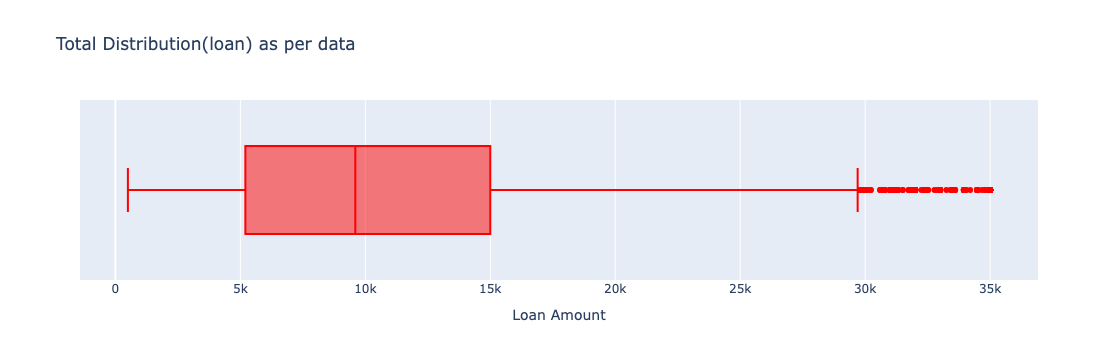

In [245]:
## loan_amnt
## data visualization - chart
px.box(Loancsv_Lcs,x='loan_amnt',width=450,height=250,title='Total Distribution(loan) as per data',labels={'loan_amnt':'Loan Amount'},color_discrete_sequence=['red']).show()


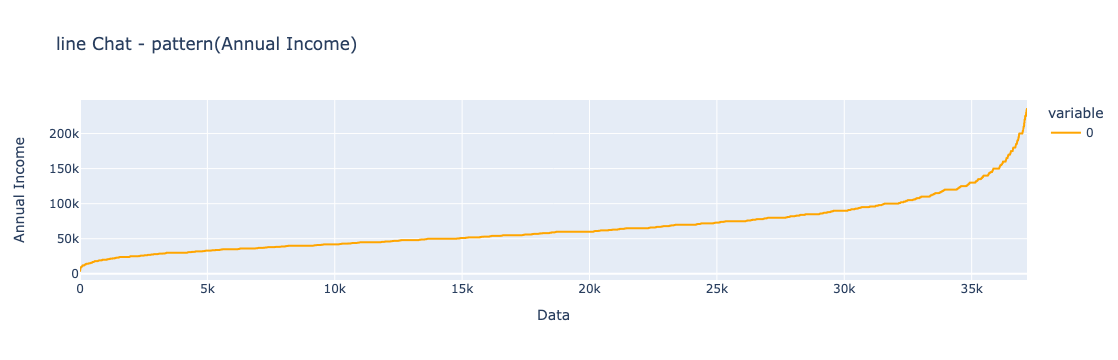

In [249]:
# checking trend of values in annual_inc using line chart to find the appropriate quantile to use to remove outliers
px.line(sorted(loan_data.annual_inc),width=450,height=250,title=' line Chat - pattern(Annual Income)',labels={'value':'Annual Income','index':' Data'},color_discrete_sequence=['orange']).show()

In [255]:
#DATA CLEANING IS DONE

In [257]:
#Starting with Analysis Part

In [ ]:
#1 Univariate Analysis

In [121]:
# Loan status 
print(Loancsv_Lcs.loan_status.value_counts()*100/Loancsv_Lcs.loan_status.count())


loan_status
Fully Paid     85.580932
Charged Off    14.419068
Name: count, dtype: float64


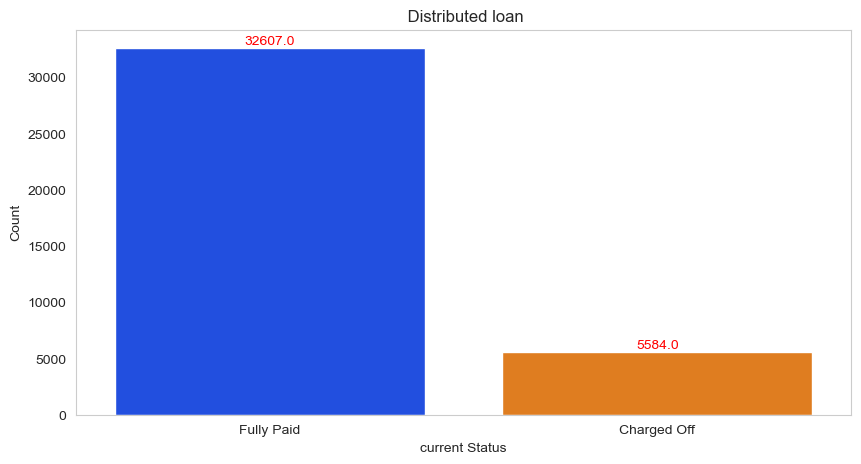

In [275]:

Loancsv_Lcs['loan_status'] = Loancsv_Lcs['loan_status'].astype(str)
#countplot
plt.figure(figsize=(10, 5))
ax = sns.countplot(data=Loancsv_Lcs, x='loan_status', palette='bright')
for p in ax.patches:
    ax.annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='red', xytext=(0, 5),
                textcoords='offset points')

# Add titles and labels
plt.title(" Distributed loan")
plt.xlabel("current Status")
plt.ylabel("Count")
plt.show()

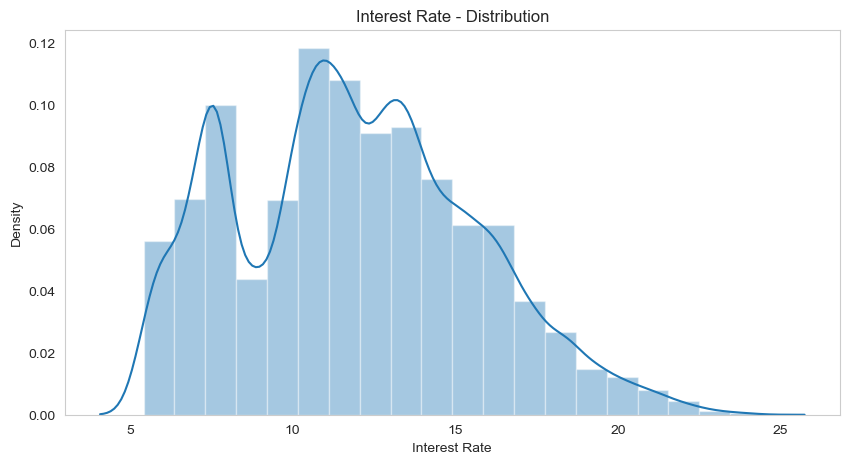

In [281]:
# Distribution of interest rate
plt.figure(figsize=(10,5))
sns.distplot(sorted(Loancsv_Lcs.int_rate),kde=True,bins=20)
plt.xlabel('Interest Rate')
plt.ylabel('Density')
plt.title('Interest Rate - Distribution')
plt.show()

In [133]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [135]:
import seaborn as sns
import matplotlib.pyplot as plt

term
36    75.37729
60    24.62271
Name: count, dtype: float64


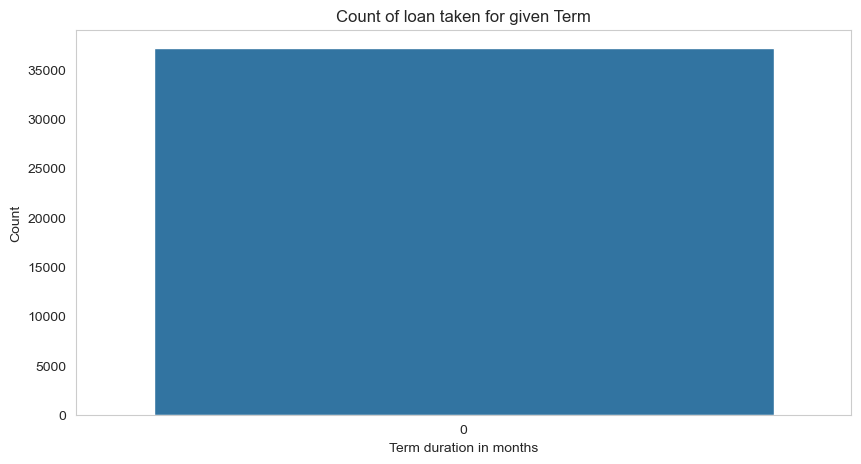

In [137]:
# Term of loan 
print(Loancsv_Lcs.term.value_counts()*100/Loancsv_Lcs.term.count())
# 0=Fully Paid, 1=Charged Off
plt.figure(figsize=(10,5))
ax=sns.countplot(Loancsv_Lcs.term)
ax.set_title('Count of loan taken for given Term')
ax.set_xlabel('Term duration in months')
ax.set_ylabel('Count')
plt.show()

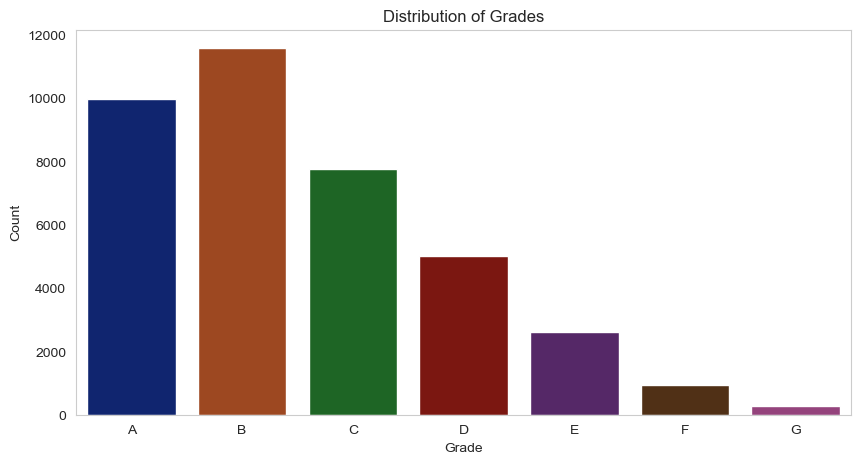

In [303]:

# Distribution of Grade
plt.figure(figsize=(10, 5))
sns.countplot(x=Loancsv_Lcs.grade,palette='dark')  # Pass `Loancsv_Lcs.grade` as `x`
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Grades')
plt.show()

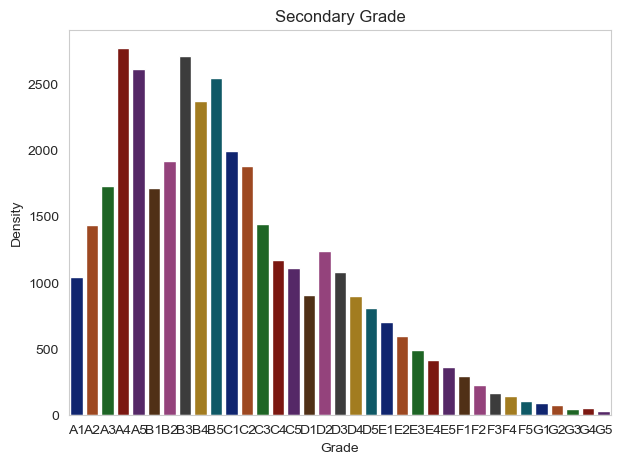

In [323]:
# Distribution of Greade
plt.figure(figsize=(10,5))
sns.countplot(x=loan_data.sub_grade,palette='dark')
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Secondary Grade')
plt.show()

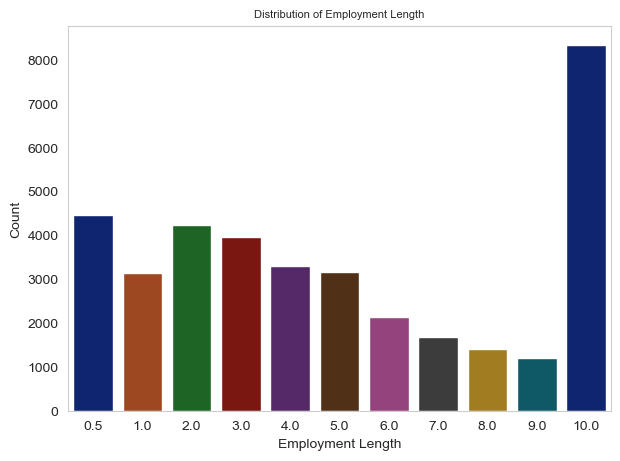

In [321]:
# Distribution of emp_length
plt.figure(figsize=(7,5))
sns.countplot(x=loan_data.emp_length,palette='dark')
plt.xlabel('Employment Length')
plt.ylabel('Count')
plt.title('Distribution of Employment Length',fontsize=8)
plt.show()

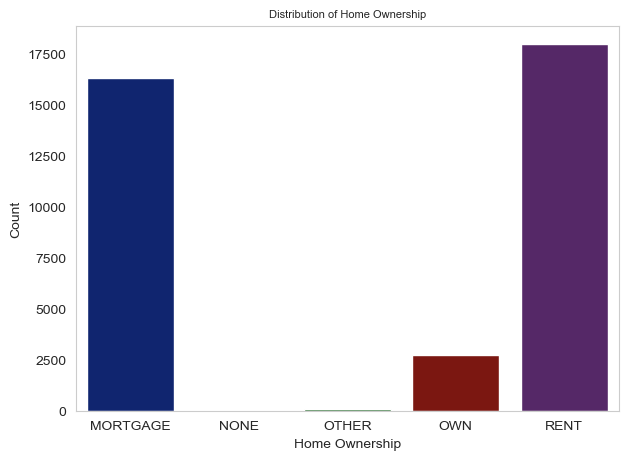

In [319]:
# Distribution of home_ownership
plt.figure(figsize=(7,5))
sns.countplot(x=loan_data.home_ownership,palette='dark')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership',fontsize=8)
plt.show()

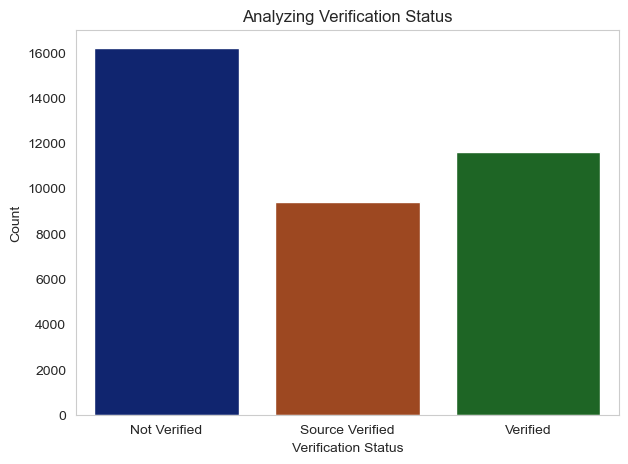

In [329]:
#  verification_status
plt.figure(figsize=(7,5))
sns.countplot(x=loan_data.verification_status, palette ='dark')
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Analyzing Verification Status',fontsize=12)
plt.show()

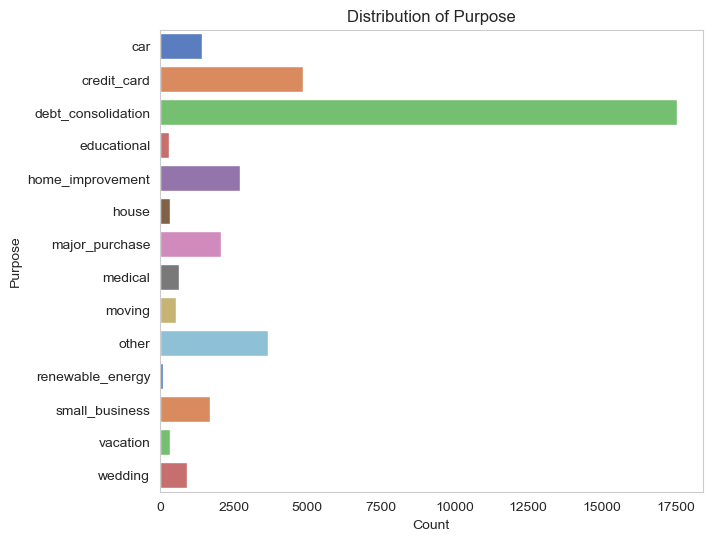

In [339]:
# Distribution reason 
plt.figure(figsize=(7,6))
sns.countplot(y=loan_data.purpose, palette='muted')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Distribution of Purpose',fontsize=12)
plt.show()

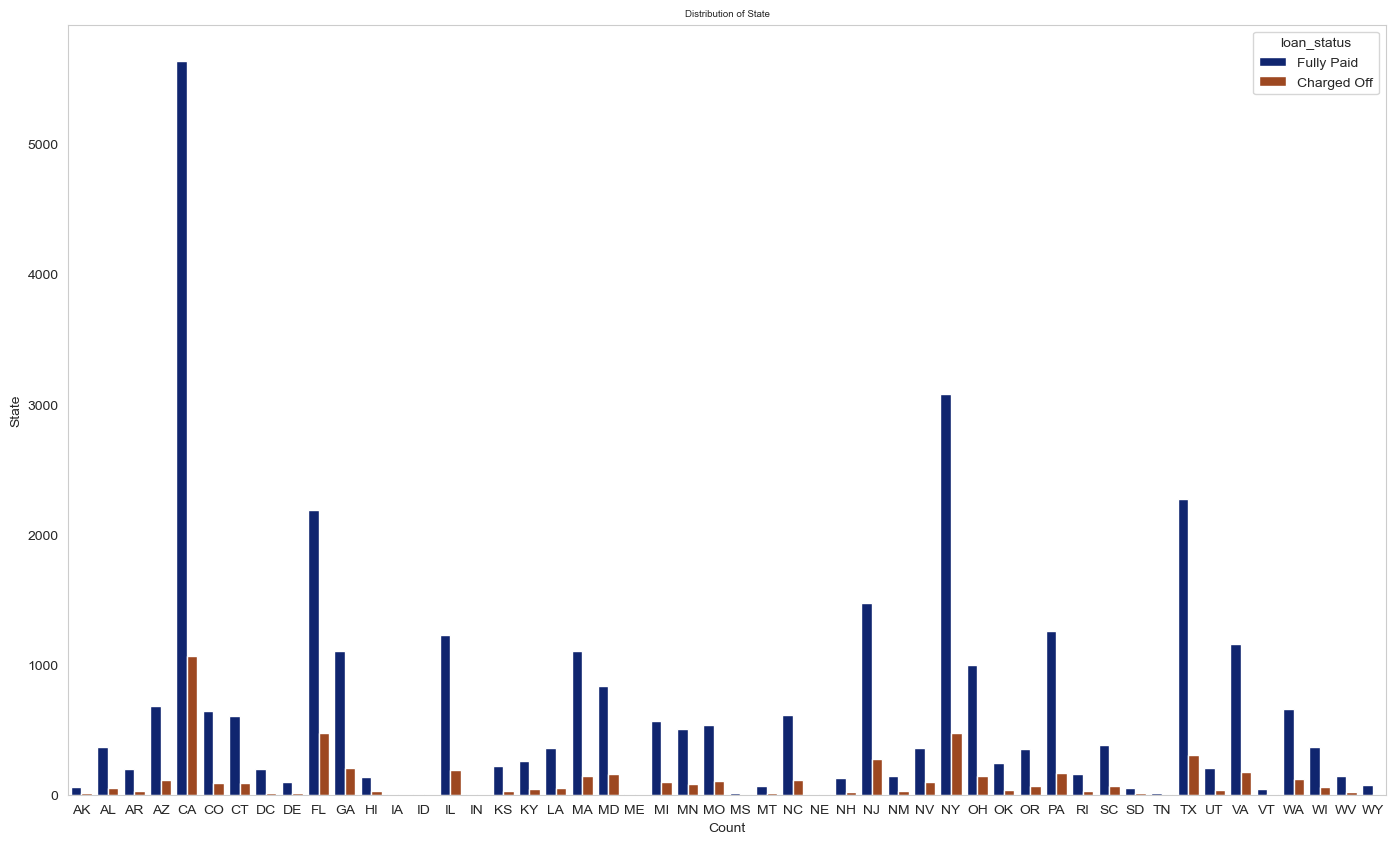

In [361]:
# Distribution of addr_state
plt.figure(figsize=(17,10))
sns.countplot(x=loan_data.addr_state,hue=loan_data.loan_status,palette='dark')
plt.xlabel('Count')
plt.ylabel('State')
plt.title('Distribution of State',fontsize=7)
plt.show()

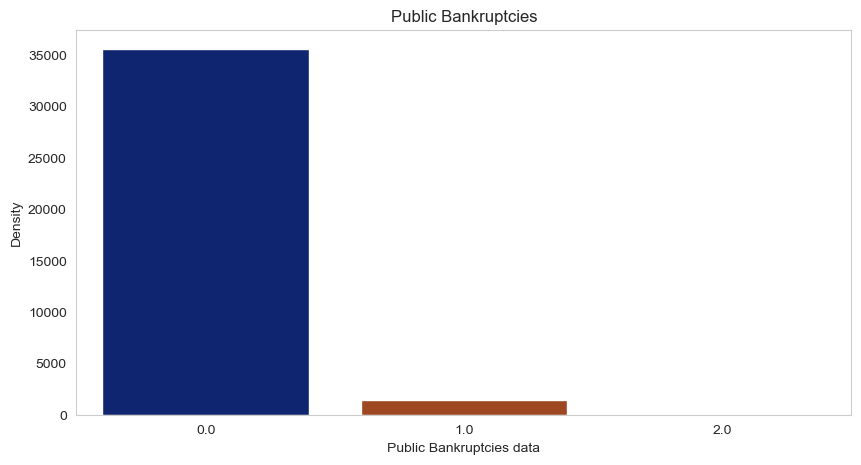

In [373]:
#Bankruptcies
plt.figure(figsize=(10,5))
sns.countplot(x=loan_data.pub_rec_bankruptcies, palette='dark')
plt.xlabel('Public Bankruptcies data')
plt.ylabel('Density')
plt.title('Public Bankruptcies',fontsize=12)
plt.show()

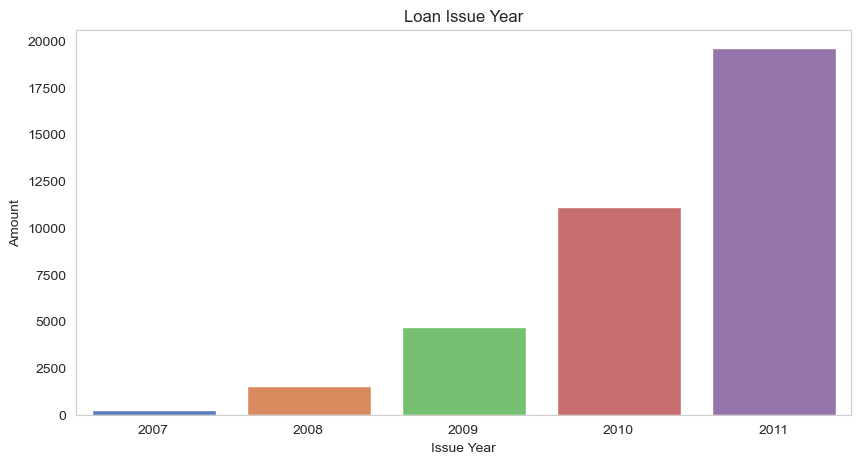

In [381]:
#issue_year
plt.figure(figsize=(10,5))
sns.countplot(x=loan_data.issue_year, palette='muted')
plt.xlabel('Issue Year')
plt.ylabel('Amount')
plt.title('Loan Issue Year',fontsize=12)
plt.show() 

In [383]:
#2Segmented Univariate Analysis

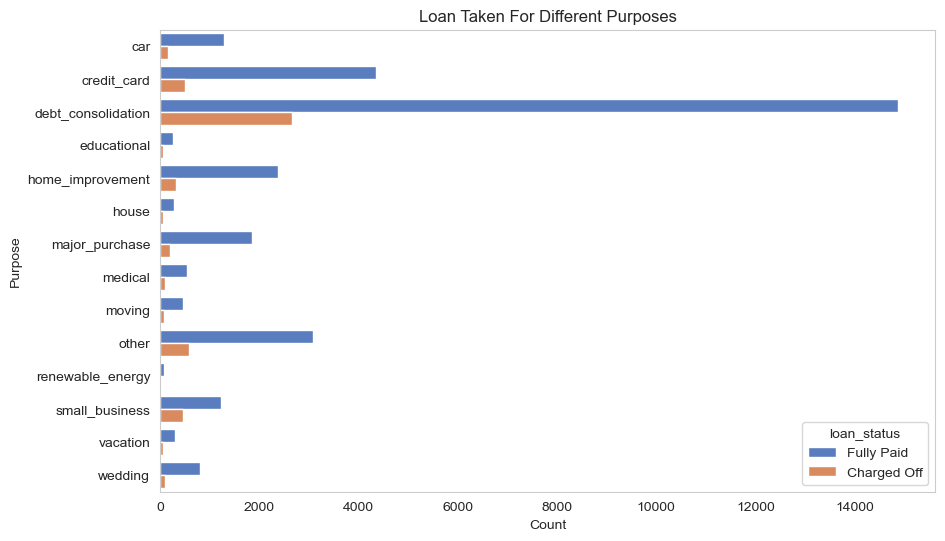

In [391]:
# Distribution of purpose based on loan_status
plt.figure(figsize=(10,6))
sns.countplot(data=loan_data,y='purpose',hue='loan_status',palette='muted')
plt.xlabel('Count')
plt.ylabel('Purpose')
plt.title('Loan Taken For Different Purposes',fontsize=12)
plt.show()

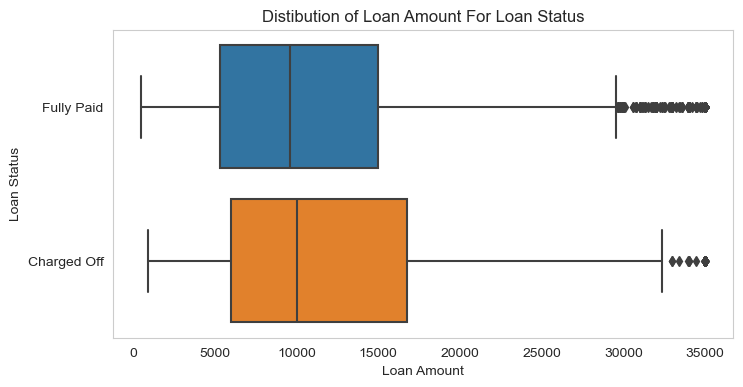

In [411]:
# Distribution of loan_amnt based on loan_status
plt.figure(figsize=(8,4))
sns.boxplot(data=loan_data,x='loan_amnt',y='loan_status')
plt.xlabel('Loan Amount')
plt.ylabel('Loan Status')
plt.title('Distibution of Loan Amount For Loan Status',fontsize=12)
plt.show()

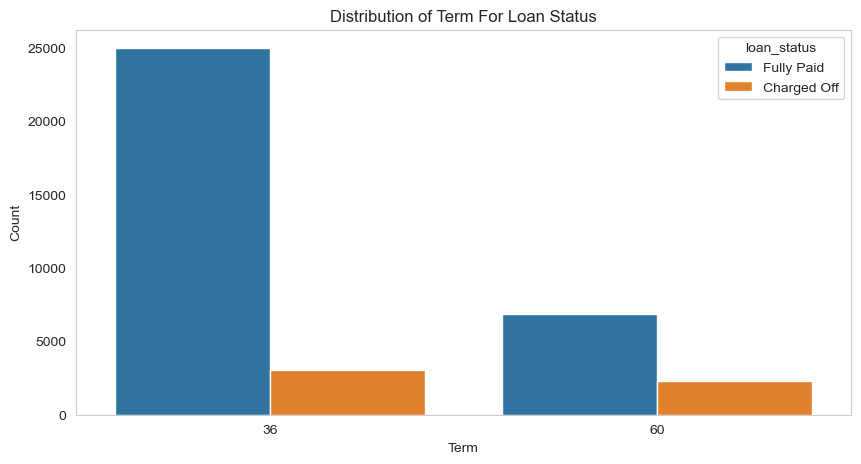

In [413]:
# Distribution of Term based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='term',hue='loan_status')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term For Loan Status',fontsize=12)
plt.show()

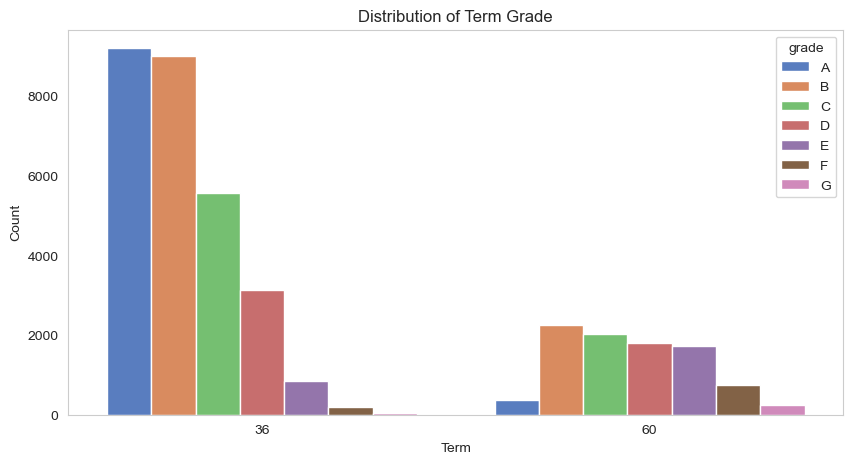

In [421]:
# Distribution of Term Grade
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='term',hue='grade',palette='muted')
plt.xlabel('Term')
plt.ylabel('Count')
plt.title('Distribution of Term Grade',fontsize=12)
plt.show()

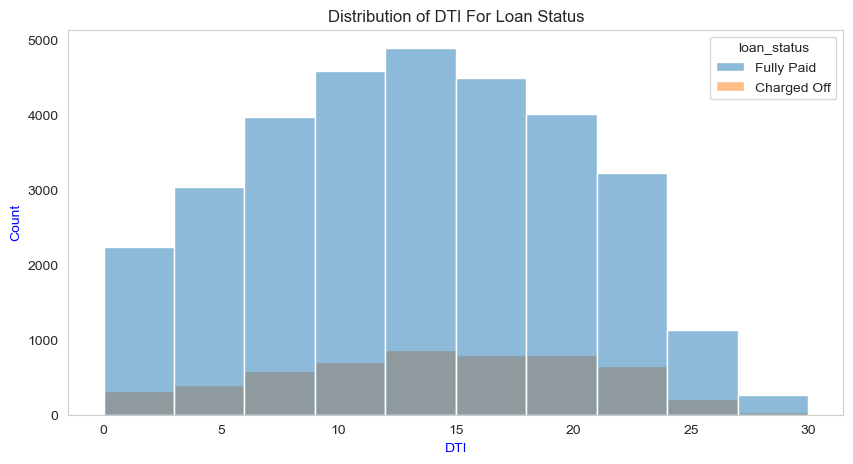

In [435]:
# DTI Grade
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='dti',hue='loan_status',bins=10)
plt.xlabel('DTI',color='Blue')
plt.ylabel('Count',color='Blue')
plt.title('Distribution of DTI For Loan Status',fontsize=12)
plt.show()

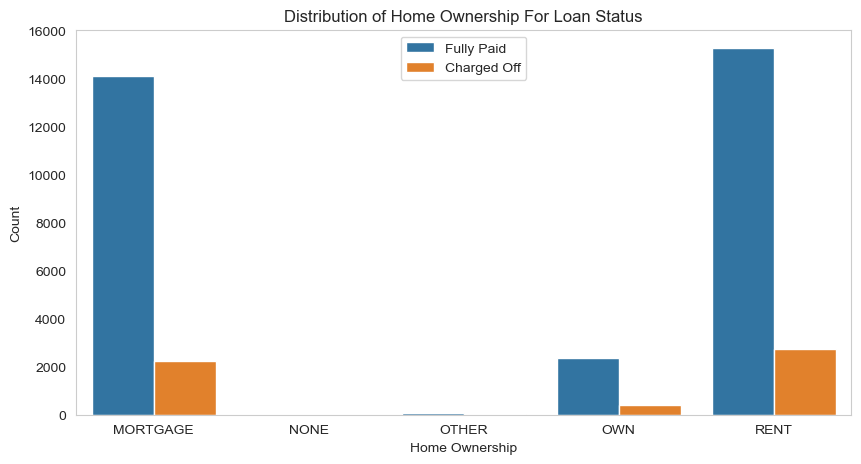

In [437]:
#house_ownership based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='home_ownership',hue='loan_status')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.title('Distribution of Home Ownership For Loan Status',fontsize=12)
plt.legend(loc='upper center')
plt.show()

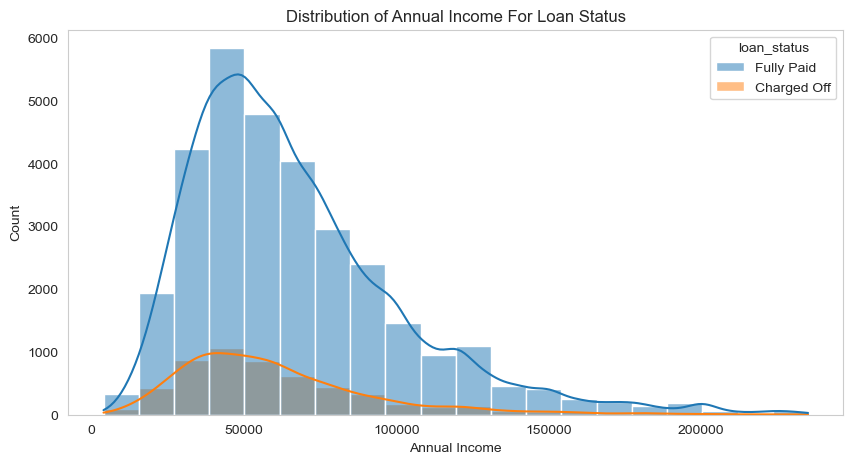

In [439]:
# Distribution of annual_inc based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='annual_inc',hue='loan_status',bins=20,kde=True)
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.title('Distribution of Annual Income For Loan Status',fontsize=12)
plt.show()

AttributeError: 'numpy.int32' object has no attribute 'startswith'

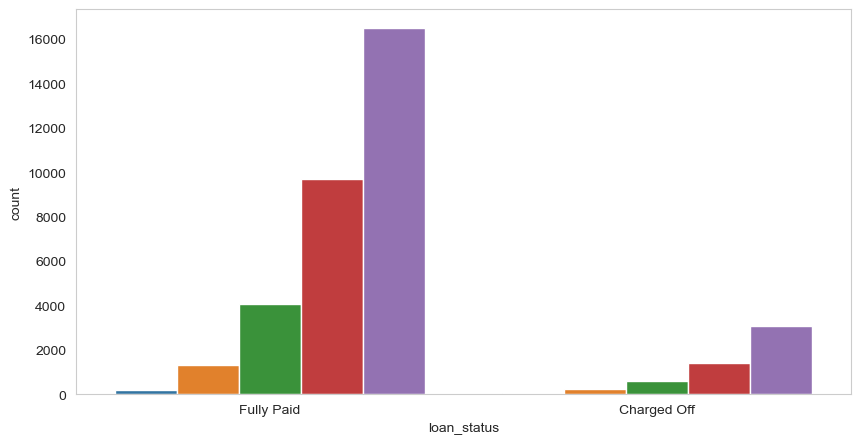

In [443]:
# Distribution of loan_status based on issue_year
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='loan_status',hue='issue_year')
plt.xlabel('Loans Status')
plt.ylabel('Count')
plt.title('Distribution of Loan Status For Issue Year',fontsize=12)
plt.show()


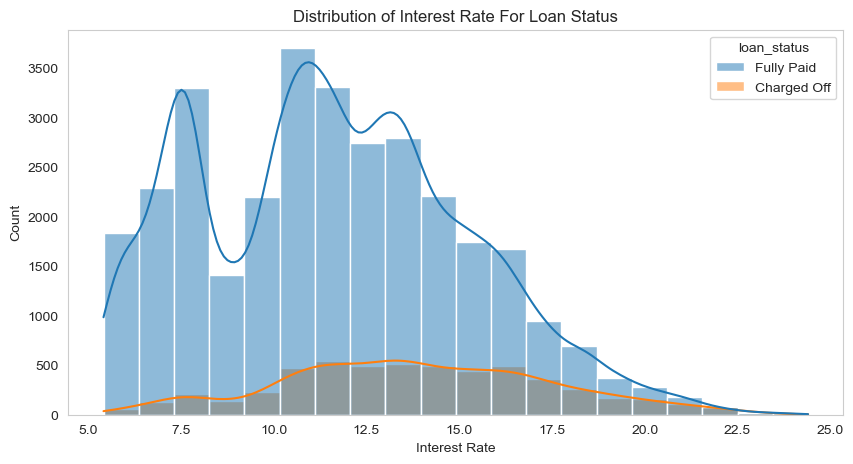

In [445]:
# Distribution of int_amnt based on loan_status
plt.figure(figsize=(10,5))
sns.histplot(data=loan_data,x='int_rate',hue='loan_status', bins=20, kde=True)
plt.xlabel('Interest Rate')
plt.ylabel('Count')
plt.title('Distribution of Interest Rate For Loan Status',fontsize=12)
plt.show()

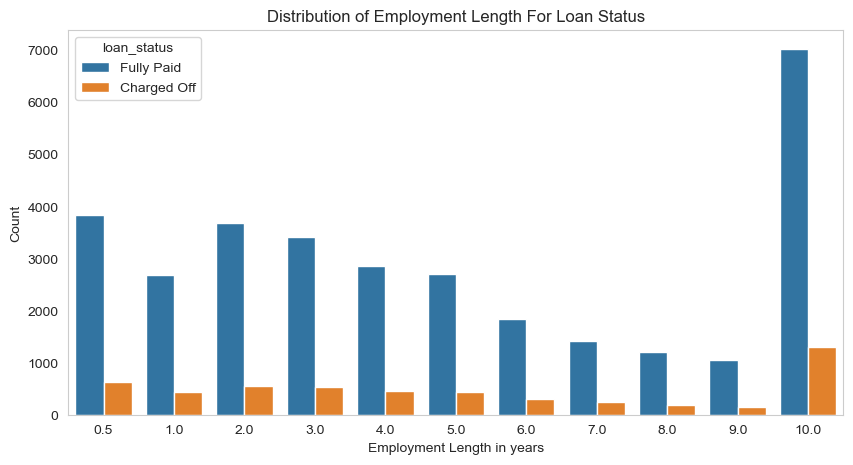

In [447]:
# Distribution of emp_length based on loan_status
plt.figure(figsize=(10,5))
sns.countplot(data=loan_data,x='emp_length',hue='loan_status')
plt.xlabel('Employment Length in years')
plt.ylabel('Count')
plt.title('Distribution of Employment Length For Loan Status',fontsize=12)
plt.show()

In [449]:
#Bivariate Analysis

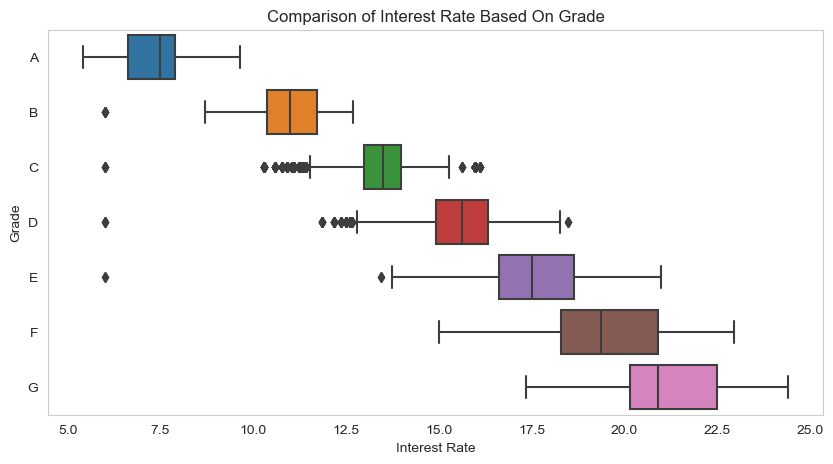

In [451]:
# Comparison of interest rate based on grade
plt.figure(figsize=(10,5))
sns.boxplot(data=loan_data,x='int_rate',y='grade')
plt.xlabel('Interest Rate')
plt.ylabel('Grade')
plt.title('Comparison Based On Grade',fontsize=12)
plt.show()

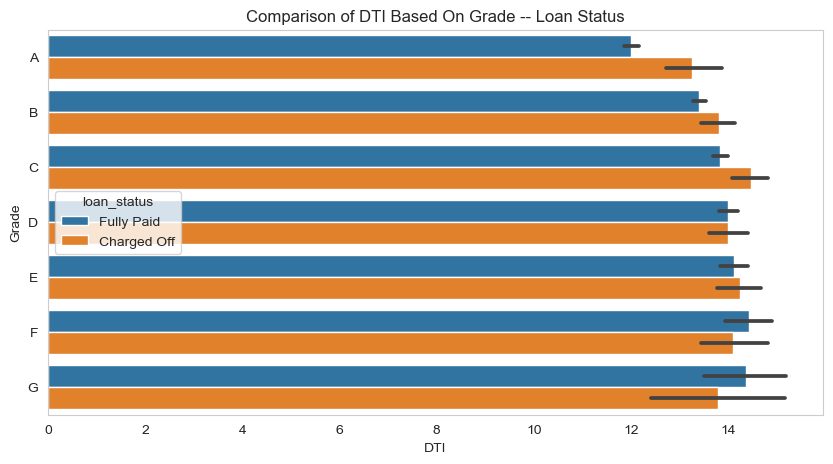

In [455]:
# Comparison of DTI over grade for loan status
plt.figure(figsize=(10,5))
sns.barplot(data=loan_data,x='dti',y='grade',hue='loan_status')
plt.xlabel('DTI')
plt.ylabel('Grade')
plt.title('Comparison of DTI Based On Grade -- Loan Status',fontsize=12)
plt.show()

<Figure size 1500x700 with 0 Axes>

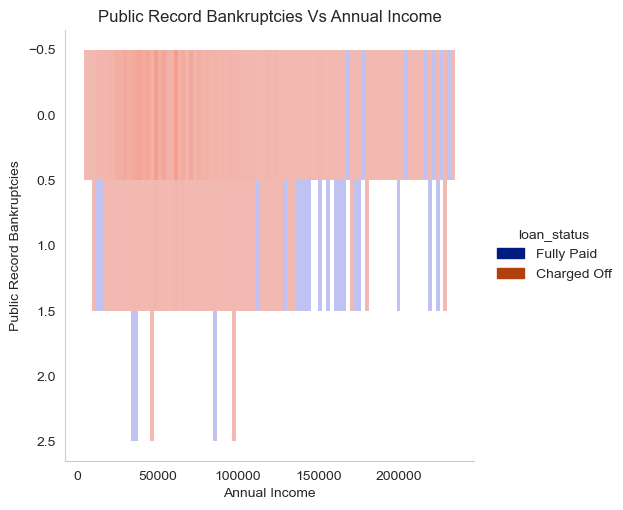

In [461]:
# Comparison of annual income to public record bankruptcy over loan status
plt.figure(figsize=(15,7))
sns.displot(y=loan_data.pub_rec_bankruptcies.astype('category'),x=loan_data.annual_inc,hue=loan_data.loan_status,palette='dark')
plt.xlabel('Annual Income')
plt.ylabel('Public Record Bankruptcies')
plt.title('Public Record Bankruptcies Vs Annual Income',fontsize=12)
plt.show()

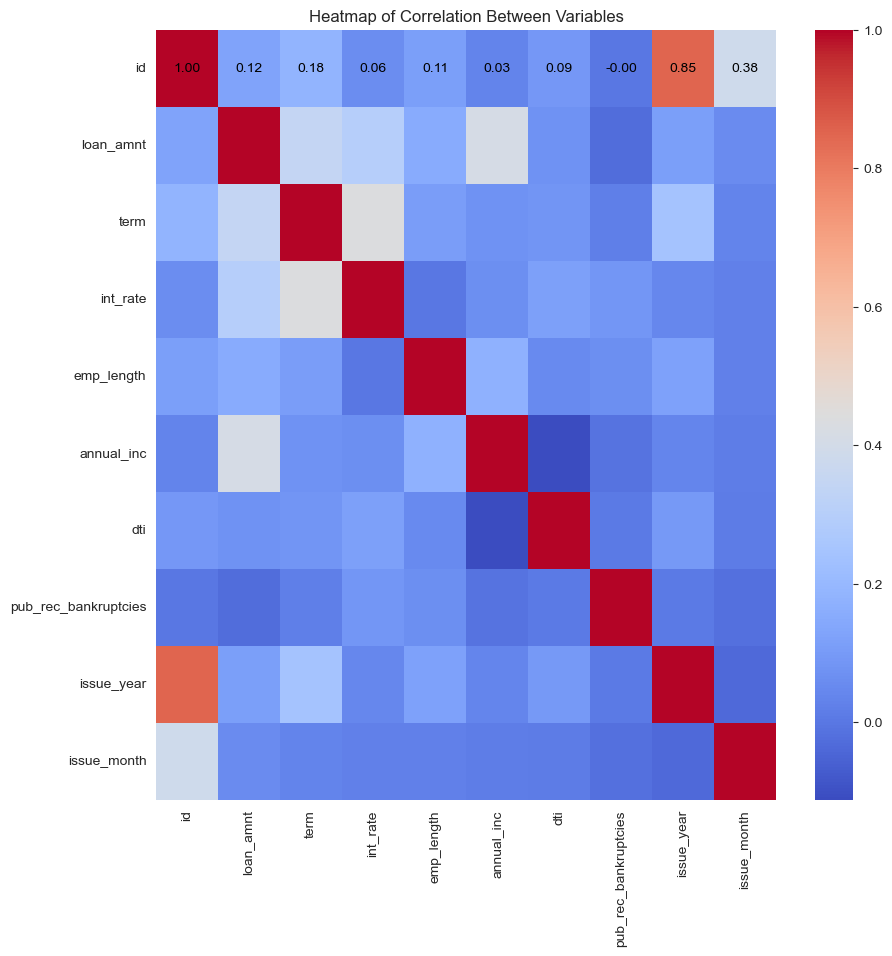

In [493]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting only numeric columns for the correlation
numeric_columns = loan_data.select_dtypes(include='number')

# Heatmap of correlation between numeric variables
plt.figure(figsize=(10, 10))
sns.heatmap(
    numeric_columns.corr(),
    annot=True,  # Display the correlation values
    fmt=".2f",  # Format to 2 decimal places
    cmap='coolwarm',  # Colormap for the heatmap
    annot_kws={"color": "black", "fontsize": 10}  # Font color and size for annotations
)
plt.title('Heatmap of Correlation Between Variables')
plt.show()